In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
data = pd.read_csv("train.csv")

In [177]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [178]:
data.shape

(8068, 11)

In [179]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [181]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [182]:
data.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [183]:
col=data.columns

In [184]:
for i in col:
  print("\n\nunique values in each column:-",i)
  print(data[i].value_counts(normalize=True))



unique values in each column:- ID
460799    0.000124
466217    0.000124
460042    0.000124
462091    0.000124
464144    0.000124
            ...   
463511    0.000124
467609    0.000124
461468    0.000124
459421    0.000124
460801    0.000124
Name: ID, Length: 8068, dtype: float64


unique values in each column:- Gender
Male      0.547471
Female    0.452529
Name: Gender, dtype: float64


unique values in each column:- Ever_Married
Yes    0.585646
No     0.414354
Name: Ever_Married, dtype: float64


unique values in each column:- Age
35    0.030987
37    0.029003
33    0.028756
42    0.028756
27    0.028384
        ...   
78    0.003594
87    0.003471
76    0.003347
80    0.002975
85    0.002727
Name: Age, Length: 67, dtype: float64


unique values in each column:- Graduated
Yes    0.621777
No     0.378223
Name: Graduated, dtype: float64


unique values in each column:- Profession
Artist           0.316717
Healthcare       0.167674
Entertainment    0.119461
Engineer         0.087991
D

In [185]:
data.drop('ID',axis=1,inplace=True)

In [186]:
percent_missing = data['Ever_Married'].isnull().sum() * 100 / len(data['Ever_Married'])

In [187]:
percent_missing

1.7352503718393655

In [188]:
data['Ever_Married'].mode()

0    Yes
dtype: object

In [189]:
data['Ever_Married'] = data['Ever_Married'].fillna(data['Ever_Married'].mode()[0])

In [190]:
percent_missing = data['Graduated'].isnull().sum() * 100 / len(data['Graduated'])

In [191]:
percent_missing

0.9667823500247893

In [192]:
data['Graduated'].mode()

0    Yes
dtype: object

In [193]:
data['Graduated'] = data['Graduated'].fillna(data['Graduated'].mode()[0])

In [194]:
percent_missing = data['Profession'].isnull().sum() * 100 / len(data['Profession'])

In [195]:
percent_missing

1.5369360436291521

In [196]:
data['Profession'].mode()

0    Artist
dtype: object

In [197]:
data['Profession'] = data['Profession'].fillna(data['Profession'].mode()[0])

In [198]:
percent_missing = data['Work_Experience'].isnull().sum() * 100 / len(data['Work_Experience'])

In [199]:
percent_missing

10.275161130391671

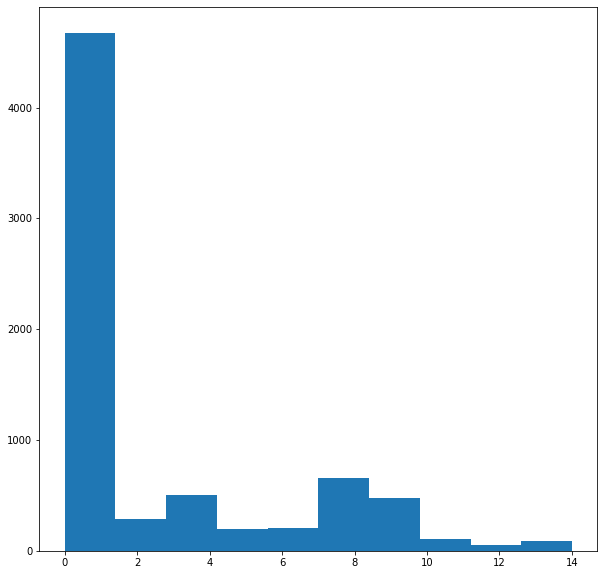

In [200]:
plt.figure(figsize=(10,10))
plt.hist(data['Work_Experience'])
plt.show()

In [201]:
data['Work_Experience'].median()

1.0

In [202]:
data['Work_Experience'] = data['Work_Experience'].fillna(data['Work_Experience'].median())

In [203]:
percent_missing = data['Family_Size'].isnull().sum() * 100 / len(data['Family_Size'])

In [204]:
percent_missing

4.152206246901339

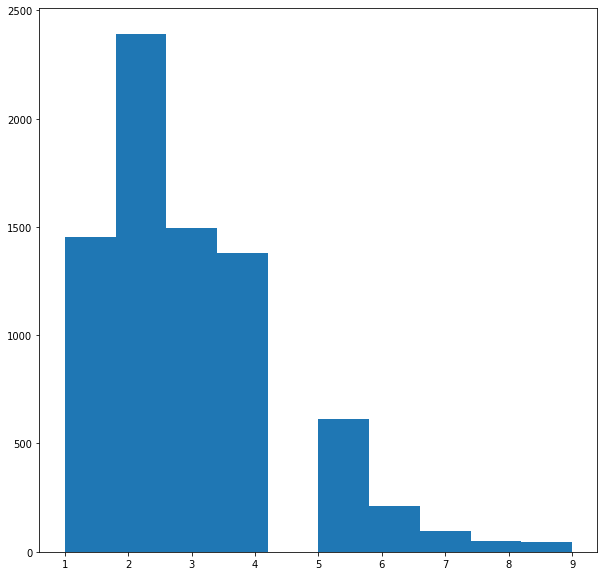

In [205]:
plt.figure(figsize=(10,10))
plt.hist(data['Family_Size'])
plt.show()

In [206]:
data['Family_Size'].median()

3.0

In [207]:
data['Family_Size'] = data['Family_Size'].fillna(data['Family_Size'].median())

In [208]:
percent_missing = data['Var_1'].isnull().sum() * 100 / len(data['Var_1'])

In [209]:
percent_missing

0.9419930589985126

In [210]:
data['Var_1'].mode()

0    Cat_6
dtype: object

In [211]:
data['Var_1'] = data['Var_1'].fillna(data['Var_1'].mode()[0])

In [212]:
data.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

Text(0.5, 1.0, 'box plot of Age')

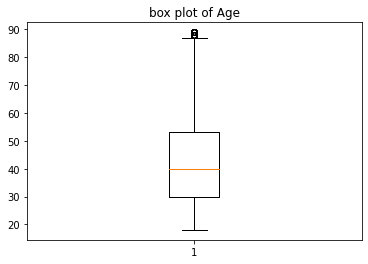

In [213]:
plt.boxplot(data['Age'])
plt.title('box plot of Age')

In [214]:
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')
data['Age'].median()
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [215]:
outlier = []
for x in data['Age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [216]:
outlier

[89,
 89,
 88,
 88,
 88,
 89,
 88,
 89,
 88,
 89,
 89,
 89,
 88,
 88,
 88,
 88,
 88,
 88,
 89,
 88,
 89,
 88,
 88,
 88,
 89,
 89,
 88,
 88,
 89,
 89,
 88,
 89,
 89,
 89,
 89,
 89,
 89,
 88,
 89,
 89,
 88,
 89,
 89,
 88,
 89,
 88,
 89,
 89,
 89,
 88,
 88,
 88,
 88,
 89,
 88,
 89,
 88,
 89,
 88,
 88,
 89,
 88,
 89,
 89,
 88,
 89,
 89,
 88,
 88,
 88,
 89]

In [217]:
len(outlier)

71

In [218]:
ind1 = data['Age']>up_lim
indices=data.loc[ind1].index

In [219]:
data.drop(indices,inplace=True)

Text(0.5, 1.0, 'box plot of age')

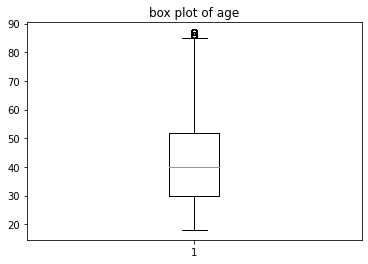

In [220]:
plt.boxplot(data['Age'])
plt.title('box plot of age')

In [221]:
data.shape

(7997, 10)

Text(0.5, 1.0, 'box plot of Work_Experience')

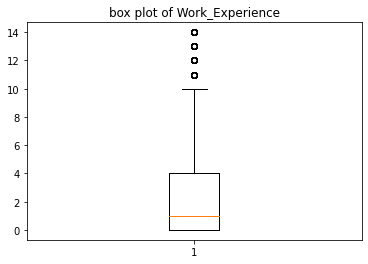

In [222]:
plt.boxplot(data['Work_Experience'])
plt.title('box plot of Work_Experience')

In [223]:
Q1 = np.percentile(data['Work_Experience'],25,interpolation='midpoint')
Q2 = np.percentile(data['Work_Experience'],50,interpolation='midpoint')
Q3 = np.percentile(data['Work_Experience'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [224]:
outlier = []
for x in data['Work_Experience']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [225]:
outlier

[12.0,
 13.0,
 14.0,
 14.0,
 11.0,
 11.0,
 14.0,
 12.0,
 13.0,
 14.0,
 12.0,
 14.0,
 14.0,
 11.0,
 13.0,
 12.0,
 13.0,
 14.0,
 12.0,
 14.0,
 12.0,
 11.0,
 13.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 14.0,
 14.0,
 11.0,
 12.0,
 14.0,
 12.0,
 12.0,
 13.0,
 14.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 14.0,
 13.0,
 11.0,
 12.0,
 14.0,
 12.0,
 13.0,
 12.0,
 13.0,
 14.0,
 14.0,
 13.0,
 11.0,
 13.0,
 13.0,
 13.0,
 11.0,
 11.0,
 12.0,
 14.0,
 12.0,
 14.0,
 14.0,
 12.0,
 14.0,
 12.0,
 14.0,
 11.0,
 11.0,
 11.0,
 14.0,
 14.0,
 13.0,
 13.0,
 14.0,
 11.0,
 11.0,
 11.0,
 14.0,
 11.0,
 12.0,
 14.0,
 12.0,
 11.0,
 13.0,
 11.0,
 12.0,
 12.0,
 11.0,
 11.0,
 12.0,
 12.0,
 13.0,
 13.0,
 14.0,
 13.0,
 11.0,
 14.0,
 13.0,
 12.0,
 14.0,
 12.0,
 11.0,
 14.0,
 14.0,
 12.0,
 11.0,
 14.0,
 12.0,
 12.0,
 13.0,
 12.0,
 13.0,
 13.0,
 12.0,
 11.0,
 13.0,
 14.0,
 13.0,
 14.0,
 11.0,
 11.0,
 13.0,
 13.0,
 14.0,
 13.0,
 13.0,
 12.0,
 11.0,
 12.0,
 11.0,
 12.0,
 13.0,
 13.0,
 14.0,
 12.0,
 12.0,
 12.0,
 14.0,
 13.0,

In [226]:
len(outlier)

188

In [227]:
ind1 = data['Work_Experience']>up_lim
indices=data.loc[ind1].index

In [228]:
data.drop(indices,inplace=True)

Text(0.5, 1.0, 'box plot of Work_Experience')

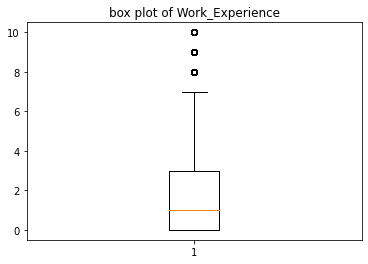

In [229]:
plt.boxplot(data['Work_Experience'])
plt.title('box plot of Work_Experience')

Text(0.5, 1.0, 'box plot of Family_Size')

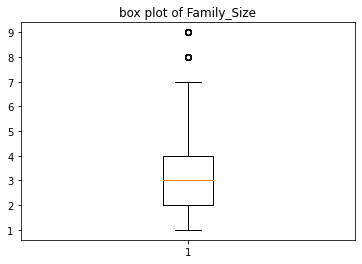

In [230]:
plt.boxplot(data['Family_Size'])
plt.title('box plot of Family_Size')

In [231]:
Q1 = np.percentile(data['Family_Size'],25,interpolation='midpoint')
Q2 = np.percentile(data['Family_Size'],50,interpolation='midpoint')
Q3 = np.percentile(data['Family_Size'],75,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [232]:
outlier = []
for x in data['Family_Size']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [233]:
outlier

[8.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 9.0,
 8.0,
 8.0,
 9.0,
 9.0,
 8.0,
 9.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 8.0,
 9.0,
 9.0,
 9.0,
 8.0,
 8.0,
 8.0,
 9.0,
 8.0,
 9.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 9.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 8.0,
 9.0,
 9.0,
 9.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 8.0,
 9.0,
 9.0,
 8.0,
 9.0]

In [234]:
len(outlier)

89

In [235]:
ind1 = data['Family_Size']>up_lim
indices=data.loc[ind1].index

In [236]:
data.drop(indices,inplace=True)

Text(0.5, 1.0, 'box plot of Family_Size')

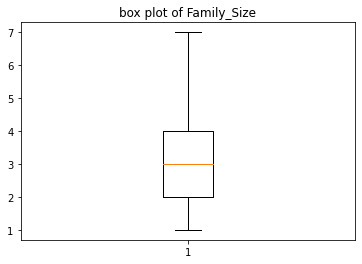

In [237]:
plt.boxplot(data['Family_Size'])
plt.title('box plot of Family_Size')

In [238]:
data.shape

(7720, 10)

In [239]:
data_new = data

In [240]:
data=pd.get_dummies(data,columns=['Gender','Ever_Married','Graduated'])

In [241]:
data.head()

,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes
0,22,Healthcare,1.0,Low,4.0,Cat_4,D,0,1,1,0,1,0
1,38,Engineer,1.0,Average,3.0,Cat_4,A,1,0,0,1,0,1
2,67,Engineer,1.0,Low,1.0,Cat_6,B,1,0,0,1,0,1
3,67,Lawyer,0.0,High,2.0,Cat_6,B,0,1,0,1,0,1
4,40,Entertainment,1.0,High,6.0,Cat_6,A,1,0,0,1,0,1


In [242]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

In [243]:
data_new_new=data

In [244]:
 data['Profession']=label.fit_transform(data['Profession'])

In [245]:
 data['Spending_Score']=label.fit_transform(data['Spending_Score'])

In [246]:
 data['Var_1']=label.fit_transform(data['Var_1'])

In [247]:
data.head()

,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes
0,22,5,1.0,2,4.0,3,D,0,1,1,0,1,0
1,38,2,1.0,0,3.0,3,A,1,0,0,1,0,1
2,67,2,1.0,2,1.0,5,B,1,0,0,1,0,1
3,67,7,0.0,1,2.0,5,B,0,1,0,1,0,1
4,40,3,1.0,1,6.0,5,A,1,0,0,1,0,1


In [248]:
X = data.drop(['Segmentation'],axis=1)
y = data['Segmentation']

In [249]:
test = pd.read_csv("test.csv")

In [250]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [251]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [252]:
test.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [253]:
test.shape

(2627, 10)

In [254]:
test['Ever_Married'].mode()

0    Yes
dtype: object

In [255]:
test['Ever_Married'] = test['Ever_Married'].fillna(test['Ever_Married'].mode()[0])

In [256]:
test['Graduated'].mode()

0    Yes
dtype: object

In [257]:
test['Graduated'] = test['Graduated'].fillna(test['Graduated'].mode()[0])

In [258]:
test['Profession'].mode()

0    Artist
dtype: object

In [259]:
test['Profession'] = test['Profession'].fillna(test['Profession'].mode()[0])

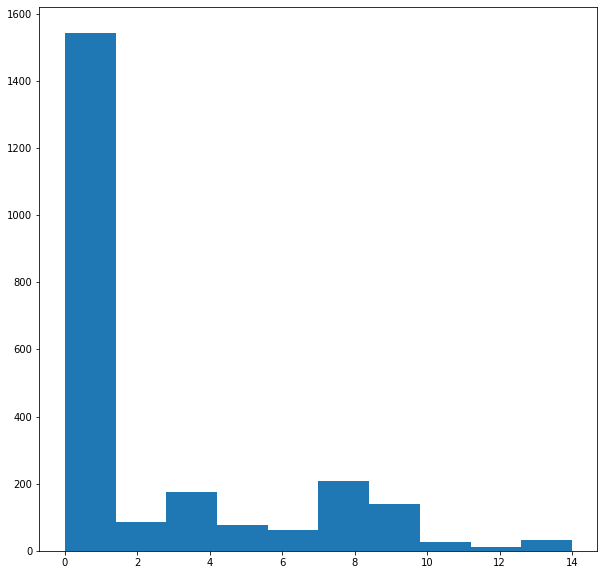

In [260]:
plt.figure(figsize=(10,10))
plt.hist(test['Work_Experience'])
plt.show()

In [261]:
test['Work_Experience'] = test['Work_Experience'].fillna(test['Work_Experience'].median())

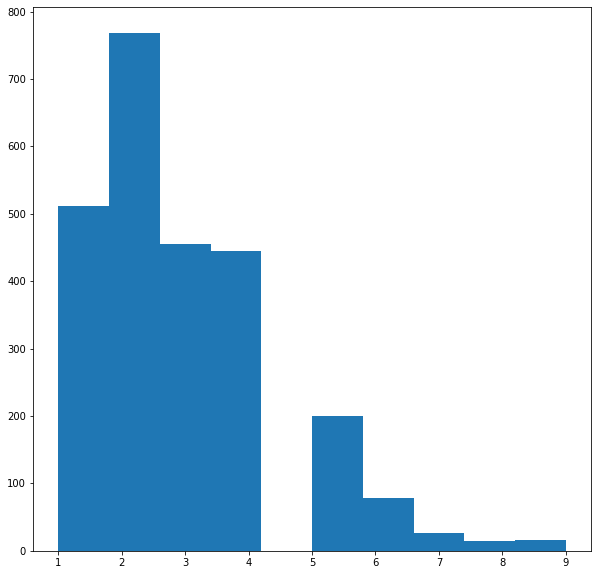

In [262]:
plt.figure(figsize=(10,10))
plt.hist(test['Family_Size'])
plt.show()

In [263]:
test['Family_Size'] = test['Family_Size'].fillna(test['Family_Size'].median())

In [264]:
test['Var_1'].mode()

0    Cat_6
dtype: object

In [265]:
test['Var_1'] = test['Var_1'].fillna(test['Var_1'].mode()[0])

In [266]:
test.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [267]:
test=pd.get_dummies(test,columns=['Gender','Ever_Married','Graduated'])

In [268]:
col=test.columns
for i in col:
    test[i]=label.fit_transform(test[i])

In [269]:
test.head()

,ID,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes
0,0,16,2,0,2,0,5,1,0,0,1,0,1
1,1,17,5,8,0,3,5,0,1,0,1,0,1
2,2,46,0,0,2,0,5,1,0,0,1,1,0
3,3,37,4,11,1,1,5,0,1,0,1,1,0
4,4,1,8,1,2,3,5,1,0,1,0,1,0


In [270]:
test.drop('ID',axis=1,inplace=True)

In [271]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X,y)
y_pred = logit_model.predict(test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [272]:
y_pred

array(['A', 'D', 'A', ..., 'A', 'D', 'D'], dtype=object)

In [273]:
sample = pd.read_csv('sample_submission.csv')

In [274]:
sample['Segmentation']=y_pred

In [275]:
sample.to_csv("submission-1.csv",index=False)

In [276]:
from sklearn.naive_bayes import BernoulliNB
label=BernoulliNB()
label.fit(X,y)
y_pred2=label.predict(test)
print(y_pred2)

['B' 'C' 'B' ... 'D' 'B' 'D']


In [277]:
sample['Segmentation']=y_pred2
sample.to_csv("submission-2.csv",index=False)

In [278]:
from sklearn.svm import SVC
linsvm_model=SVC()
linsvm_model.fit(X,y)
y_pred3=linsvm_model.predict(test)
print(y_pred3)

['D' 'D' 'A' ... 'A' 'D' 'D']


In [279]:
svm_nonlinear=SVC(kernel='poly',degree=2,gamma='scale')
svm_nonlinear.fit(X,y)
y_pred4=svm_nonlinear.predict(test)
print(y_pred4)

['D' 'D' 'A' ... 'D' 'D' 'D']


In [280]:
sample['Segmentation']=y_pred3
sample.to_csv("submission-3.csv",index=False)

In [281]:
sample['Segmentation']=y_pred4
sample.to_csv("submission-4.csv",index=False)

In [282]:
svm_rbf=SVC(kernel='rbf',degree=2,gamma='scale')
svm_rbf.fit(X,y)
y_pred5=svm_rbf.predict(test)
print(y_pred5)

['D' 'D' 'A' ... 'A' 'D' 'D']


In [283]:
sample['Segmentation']=y_pred5
sample.to_csv("submission-5.csv",index=False)

In [284]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(X,y)
y_pred6=decision.predict(test)
print(y_pred6)

['A' 'D' 'D' ... 'B' 'A' 'D']


In [285]:
sample['Segmentation']=y_pred6
sample.to_csv("submission-6.csv",index=False)

In [286]:
from sklearn.ensemble import RandomForestClassifier
Rand=RandomForestClassifier(n_estimators=30)
Rand.fit(X,y)
y_pred7=Rand.predict(test)
print(y_pred7)

['A' 'A' 'B' ... 'B' 'D' 'D']


In [287]:
sample['Segmentation']=y_pred7
sample.to_csv("submission-7.csv",index=False)

In [288]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X,y)
y_pred8=gb.predict(test)
print(y_pred8)

['A' 'D' 'B' ... 'A' 'D' 'D']


In [289]:
sample['Segmentation']=y_pred8
sample.to_csv("submission-8.csv",index=False)